# Market Segmentation

In [1]:
!pip install yellowbrick

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data_file = "beer.csv"

In [5]:
beer_df = pd.read_csv( data_file )

In [6]:
beer_df

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Kronenbourg,170,7,5.2,0.73
3,Heineken,152,11,5.0,0.77
4,Old_Milwaukee,145,23,4.6,0.28
5,Augsberger,175,24,5.5,0.40
6,Srohs_Bohemian_Style,149,27,4.7,0.42
7,Miller_Lite,99,10,4.3,0.43
8,Budweiser_Light,113,8,3.7,0.40
9,Coors,140,18,4.6,0.44


## Scaling

#### Rescaling the dataset

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
x_features = ['calories', 'sodium', 'alcohol', 'cost']

In [10]:
scaler = MinMaxScaler()
scaler.fit( beer_df[x_features] )
scaled_beer_df = scaler.transform( beer_df[x_features] )

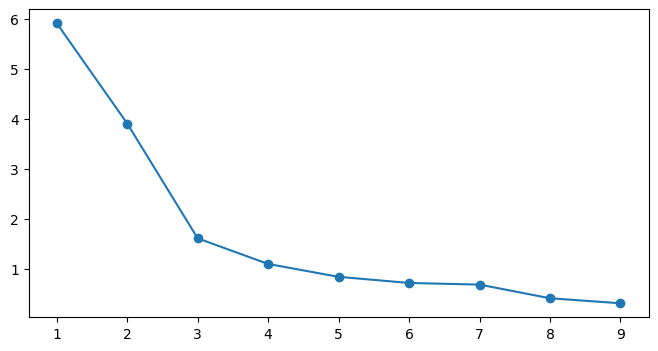

In [11]:
from sklearn.cluster import KMeans

cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( scaled_beer_df )
  cluster_errors.append( clusters.inertia_ )

plt.figure(figsize=(8,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );

#### Creating 5 Clusters

We will set k to 3 for running *KMeans* algorithm and create a new column *clusterid* in *beer_df* to capture the cluster number it is assigned to.

In [ ]:
k = 5

clusters = KMeans( k, random_state = 42 )
clusters.fit( scaled_beer_df )
beer_df["clusterid"] = clusters.labels_

In [ ]:
clusters.labels_

array([4, 4, 2, 2, 1, 1, 1, 0, 0, 4, 0, 4, 2, 2, 3, 4, 1, 3, 0],
      dtype=int32)

## Evaluating the quality of cluster using Silhouette score

#### Cluster 0

In [ ]:
beer_df[beer_df.clusterid == 0]

,name,calories,sodium,alcohol,cost,clusterid
7,Miller_Lite,99,10,4.3,0.43,0
8,Budweiser_Light,113,8,3.7,0.40,0
10,Coors_Light,102,15,4.1,0.46,0
18,Schlitz_Light,97,7,4.2,0.47,0


#### Cluster 1

In [ ]:
beer_df[beer_df.clusterid == 1]

,name,calories,sodium,alcohol,cost,clusterid
4,Old_Milwaukee,145,23,4.6,0.28,1
5,Augsberger,175,24,5.5,0.40,1
6,Srohs_Bohemian_Style,149,27,4.7,0.42,1
16,Heilemans_Old_Style,144,24,4.9,0.43,1


#### Cluster 2

In [ ]:
beer_df[beer_df.clusterid == 2]

,name,calories,sodium,alcohol,cost,clusterid
2,Kronenbourg,170,7,5.2,0.73,2
3,Heineken,152,11,5.0,0.77,2
12,Becks,150,19,4.7,0.76,2
13,Kirin,149,6,5.0,0.79,2


#### Cluster 3

In [ ]:
beer_df[beer_df.clusterid == 3]

,name,calories,sodium,alcohol,cost,clusterid
14,Pabst_Extra_Light,68,15,2.3,0.38,3
17,Olympia_Goled_Light,72,6,2.9,0.46,3


#### Cluster 4

In [ ]:
beer_df[beer_df.clusterid == 4]

,name,calories,sodium,alcohol,cost,clusterid
0,Budweiser,144,15,4.7,0.43,4
1,Schlitz,151,19,4.9,0.43,4
9,Coors,140,18,4.6,0.44,4
11,Michelob_Light,135,11,4.2,0.50,4
15,Hamms,139,19,4.4,0.43,4


In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
x_features = ['calories', 'sodium', 'alcohol', 'cost']

silhouette_score(scaled_beer_df, clusters.labels_)

np.float64(0.37215910108882744)

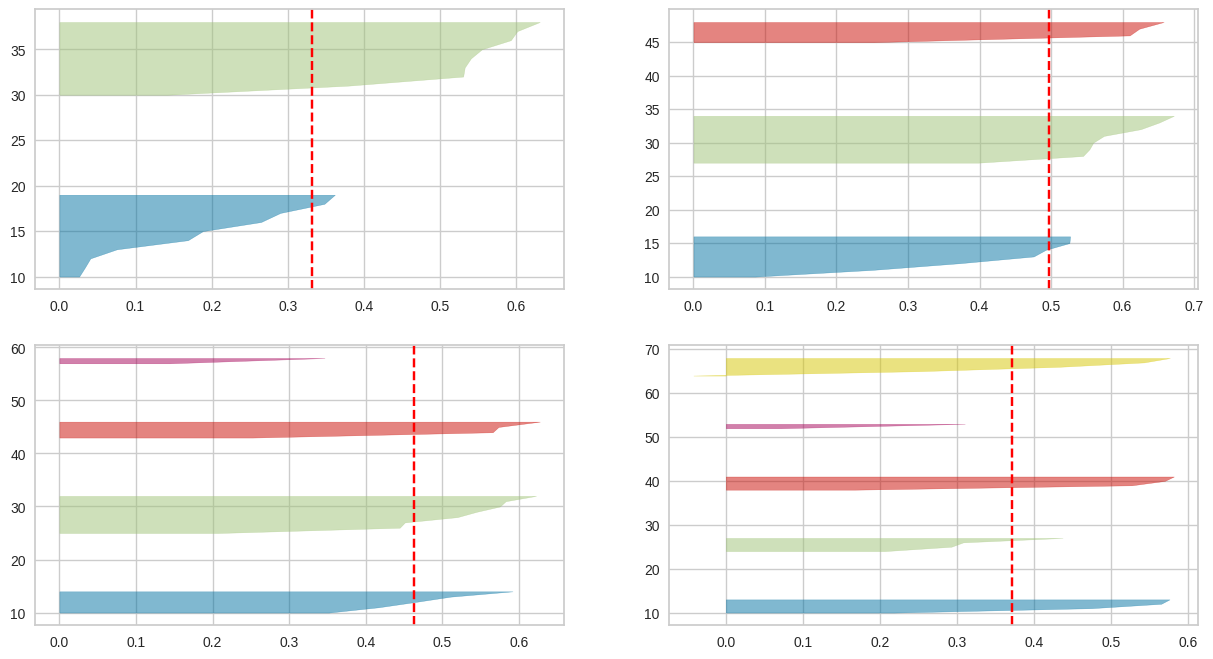

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
num_clusters = [2, 3, 4, 5]
for i, k in enumerate(num_clusters):
    km = KMeans(n_clusters=k,
                random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km,
                                      colors='yellowbrick',
                                      ax=ax[q][mod])
    visualizer.fit(scaled_beer_df)

### Calculating Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
for k in [2, 3, 4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_beer_df)
    score = silhouette_score(scaled_beer_df, kmeans.labels_)
    print(f"k = {k}, silhouette_score = {score:.3f}")

k = 2, silhouette_score = 0.332
k = 3, silhouette_score = 0.497
k = 4, silhouette_score = 0.463
k = 5, silhouette_score = 0.372


# Evaluating Cluster Performane

## Calinski-Harabasz Index

In [ ]:
from sklearn.metrics import calinski_harabasz_score

In [ ]:
cluster_range = range( 2, 6 )
ch_scores = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, random_state = 42 )
  clusters.fit( scaled_beer_df )
  print(f"n_cluster: {num_clusters} - CH Score: {calinski_harabasz_score(scaled_beer_df, clusters.labels_)}" )

n_cluster: 2 - CH Score: 9.992821272241542
n_cluster: 3 - CH Score: 21.2552193374943
n_cluster: 4 - CH Score: 21.743107578544173
n_cluster: 5 - CH Score: 20.04183610573912


## Understanding Feature Contributions

In [ ]:
x_features = ['calories', 'sodium', 'alcohol', 'cost']
scaled_beer_df = pd.DataFrame(scaled_beer_df, columns = x_features)

In [33]:
model = KMeans(n_clusters=5, random_state = 42)
model.fit(scaled_beer_df)

KMeans(n_clusters=5, random_state=42)

In [ ]:
from sklearn.feature_selection import f_classif
import numpy as np

X = scaled_beer_df
y = model.labels_

f_scores, p_vals = f_classif(X, y)
importance = pd.Series(f_scores, index=x_features).sort_values(ascending=False)
print(importance)

cost        49.589376
calories    43.639164
alcohol     25.552469
sodium       8.528882
dtype: float64


In [ ]:
f_scores_df = pd.DataFrame( {"features": x_features,
                             "f_scores": f_scores,
                             "p_values": p_vals} )

In [ ]:
f_scores_df.sort_values("p_values")

,features,f_scores,p_values
3,cost,49.589376,4.080456e-08
0,calories,43.639164,9.305077e-08
2,alcohol,25.552469,2.635771e-06
1,sodium,8.528882,1.052886e-03


In [ ]:
beer_df['clusterid'] = model.labels_

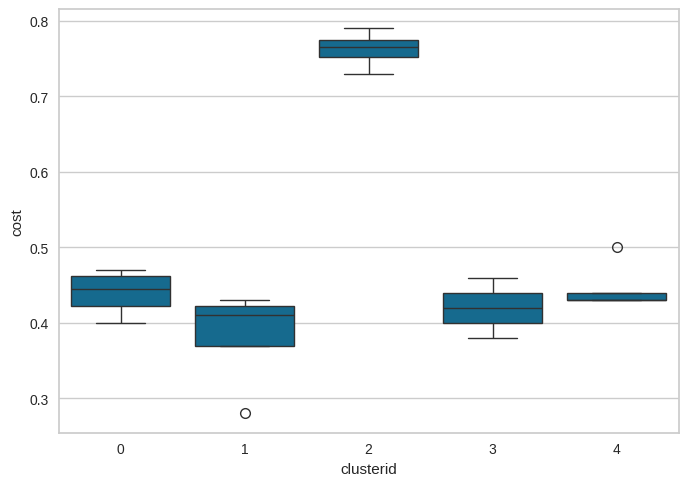

In [ ]:
sn.boxplot(beer_df,
            y = 'cost',
            x = 'clusterid');

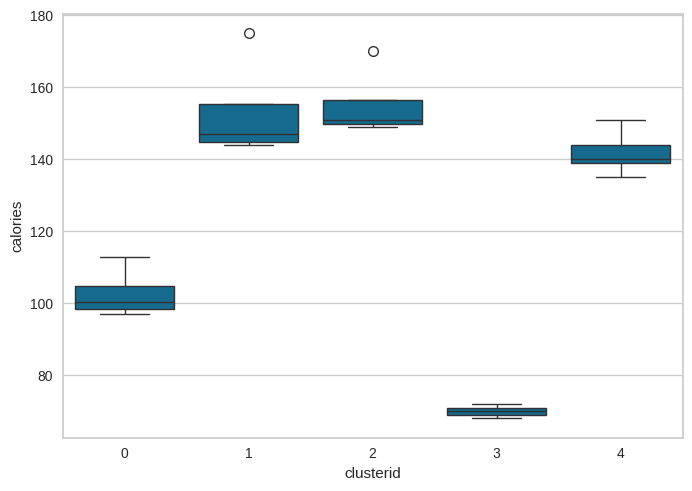

In [ ]:
sn.boxplot(beer_df,
            y = 'calories',
            x = 'clusterid');

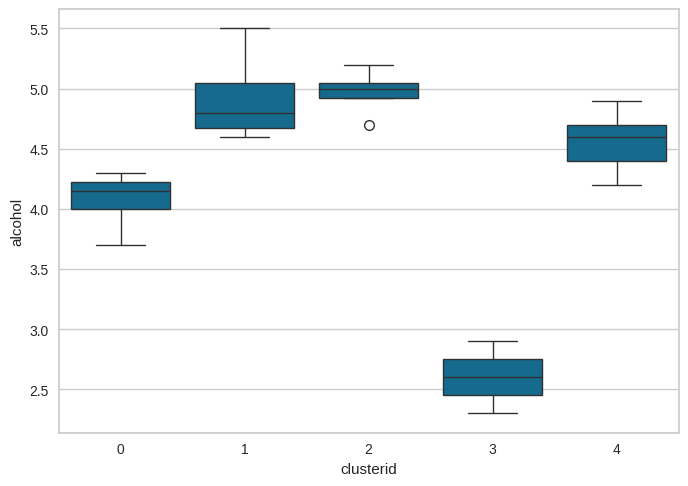

In [ ]:
sn.boxplot(beer_df,
            y = 'alcohol',
            x = 'clusterid');

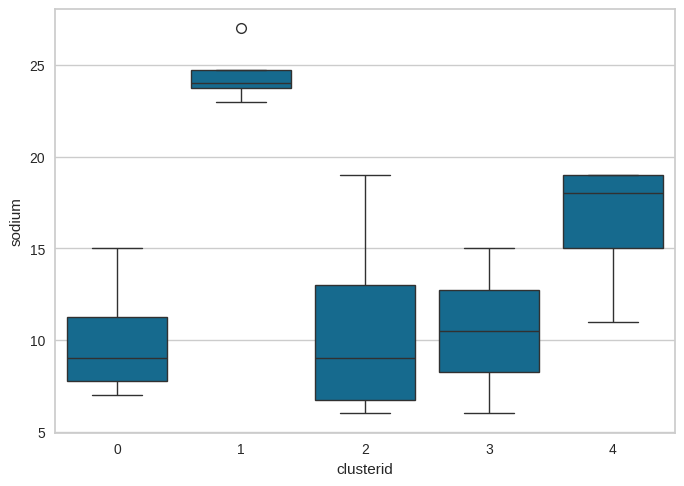

In [ ]:
sn.boxplot(beer_df,
            y = 'sodium',
            x = 'clusterid');

## Assiging New Brands to existing cluster

In [34]:
model.cluster_centers_

array([[0.32476636, 0.19047619, 0.5546875 , 0.31372549],
       [0.79672897, 0.88095238, 0.8203125 , 0.20098039],
       [0.81542056, 0.22619048, 0.8359375 , 0.94607843],
       [0.01869159, 0.21428571, 0.09375   , 0.2745098 ],
       [0.68971963, 0.4952381 , 0.70625   , 0.3254902 ]])

In [35]:
new_brand = [140, 10, 5.0, 0.80]

In [36]:
new_brand_scaled = scaler.transform([new_brand])

In [37]:
model.predict(new_brand_scaled)

array([2], dtype=int32)